In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px

Memuat library penting: pandas untuk manipulasi data, numpy untuk komputasi numerik, matplotlib dan plotly untuk visualisasi grafik interaktif.

In [2]:
NPM = 3010059
np.random.seed(NPM)

Kode di atas menetapkan angka 10059 yang mana merupakan 7 digit terakir dari NPM saya(24083010059) sebagai seed untuk generator angka acak NumPy. Fungsi seed memastikan hasil angka acak yang sama setiap kali kode dijalankan, sehingga simulasi bisa direproduksi dengan konsisten dan mudah diuji ulang.

In [3]:
makan = pd.read_csv("makanan.csv")
display(makan)

,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mieinstan,0.5,0.1,0.7,0.2,4000.0


Selanjutnya membaca data "makanan". Data yang ditampilkan dalam tabel ini merupakan kumpulan informasi mengenai 20 jenis makanan yang berbeda. Setiap baris pada tabel merepresentasikan satu jenis makanan, mulai dari "ayamgeprek" sampai "tteokbokki". Untuk setiap makanan, terdapat lima atribut numerik yang memberikan gambaran kuantitatif mengenai karakteristiknya: "kenyang" (tingkat kekenyangan), "sehat" (tingkat kesehatan), "rasa" (tingkat kelezatan), dan "bosan" (tingkat kebosanan). Nilai-nilai untuk atribut-atribut ini bervariasi, misalnya tingkat kenyang berkisar antara 0.3 sampai 1.0, tingkat kesehatan antara 0.1 sampai 0.9, tingkat rasa antara 0.5 sampai 1.0, dan tingkat kebosanan antara 0.2 sampai 0.8. Kolom terakhir, "harga", menunjukkan harga setiap makanan dalam mata uang Rupiah, dengan rentang harga dari Rp 4.000 sampai Rp 30.000.

In [4]:
budget = 1e6  # rupiah
wkenyang_base = 0.9
wrasa_base = 0.8
wsehat_base = 0.9
wbosan_base = 0.6

Sebelumnya : Variabel budget = 1e6 menetapkan nilai budget sebesar 1 juta rupiah. Variabel wkenyang_base = 0.8, wrasa_base = 0.7, wsehat_base = 0.9, dan wbosan_base = 0.2 adalah bobot dasar preferensi untuk aspek kenyang, rasa, kesehatan, dan bosan yang digunakan dalam perhitungan skor makanan. Nilai ini menunjukkan seberapa penting setiap aspek bagi simulasi.

Saya melakukan perubahan pada beban beberapa aspek, antara lain:
* wkenyang_base menjadi 0.9
* wrasa_base menjadi 0.8
* wbosan_base menjadi 0.6

In [5]:
SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)

SAMPLE_NUM = 500 menentukan jumlah sampel atau simulasi yang akan dijalankan sebanyak 500 kali. Kemudian sampleid = np.arange(0, SAMPLE_NUM) membuat array berisi angka 0 sampai 499 sebagai identitas atau indeks untuk setiap sampel tersebut. Fungsi np.arange menghasilkan deretan angka berurutan dalam rentang yang ditentukan.

In [6]:
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.int64)

Baris kode ini membuat beberapa array kosong (berisi nol) dengan panjang 500, untuk menyimpan hasil simulasi. Variabel skor, sisa, dan sehat adalah array 1 dimensi bertipe angka pecahan (float) untuk skor kumulatif, sisa dana, dan skor kesehatan. resp_pilih adalah array 2 dimensi bertipe bilangan bulat, menyimpan indeks makanan yang dipilih pada 62 slot waktu tiap sampel. Array nol ini sebagai tempat menampung data hasil simulasi nanti.

In [7]:
SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih= np.zeros((SAMPLE_NUM, 62), dtype=np.double)

Variabel SISA_MININUM dan SISA_MAKSIMUM menetapkan batas bawah dan atas untuk sisa uang (150 ribu sampai 300 ribu rupiah). bin_sisa adalah array rentang nilai dari 150 ribu sampai sebelum 300 ribu dengan interval 1000, digunakan untuk mengelompokkan nilai sisa uang. resp_sehat adalah matriks untuk menyimpan skor sehat setiap sampel dalam tiap rentang sisa uang. resp_pilih matriks untuk menyimpan pilihan makanan tiap slot sampel, diinisialisasi nol.

In [8]:
idx_dimsum = makan[makan['makanan'] == 'dimsummentai'].index[0]

Baris kode di atas digunakan untuk mencari posisi baris (indeks) dari makanan bernama "dimsummentai" pada DataFrame makan. Hasilnya adalah indeks baris pertama yang ditemukan, yang kemudian disimpan ke variabel idx_dimsum. Indeks ini penting untuk memudahkan pemilihan makanan tersebut dalam simulasi.

Prompt : "Aku ingin menambahkan syarat dimsum mentai hanya bisa dimakan 2 kali dalam 1 bulan." (Melampirkan file csv dan py)

Jawaban : Untuk menambahkan syarat agar "dimsum mentai" hanya bisa dimakan maksimal 2 kali dalam 1 bulan tanpa mengurangi kode yang sudah ada, perlu dibuat mekanisme pencatatan dan pembatasan jumlah konsumsi dimsum mentai selama simulasi 31 hari dalam satu loop. Penambahan bisa dilakukan dengan:
* Membuat variabel counter untuk menghitung konsumsi dimsum mentai pada tiap iterasi bulan per sample.
* Saat memilih makanan secara acak, periksa apakah makanannya adalah dimsum mentai.
* Jika sudah makan dimsum mentai sebanyak 2 kali, maka pilihan dimsum mentai harus diabaikan dan pilih makanan lain secara acak.

In [9]:
SEHAT_MIN = 0.5

for n in range(SAMPLE_NUM):
    budget = 1e6
    skor_kumulatif = 0.0
    skor_sehat = 0.0

    # Pilih 2 slot acak untuk dimsum mentai
    slot_dimsum = np.random.choice(np.arange(62), size=2, replace=False)

    for i in range(62):
        if i in slot_dimsum:
            pilihan = idx_dimsum
        else:
            if i % 2 == 1:
                pilihan = np.random.choice([j for j in range(len(makan))
                                            if j != idx_dimsum
                                            and j != resp_pilih[n][i-1]
                                            and makan['sehat'][j] >= SEHAT_MIN])
            else:
                pilihan = np.random.choice([j for j in range(len(makan))
                                            if j != idx_dimsum
                                            and makan['sehat'][j] >= SEHAT_MIN])

        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.4)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]
        resp_pilih[n][i] = pilihan

    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    idx_bin = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx_bin < len(bin_sisa):
        resp_sehat[n][idx_bin] = skor_sehat

Kode ini menjalankan simulasi sebanyak 500 kali, di mana pada tiap simulasi budget direset ke nilai awal. Dalam setiap simulasi, dua slot secara acak dipilih untuk makanan "dimsummentai", sedangkan slot lain dipilih acak dari makanan lain. Setiap makanan dinilai dengan bobot acak untuk kenyang, rasa, sehat, dan bosan, lalu dihitung total skor kumulatif dengan menambahkan skor tiap makanan dan mengurangkan skor bosan. Skor kesehatan juga dihitung terpisah. Harga makanan dikurangkan dari budget. Pilihan makanan disimpan per simulasi dan slot. Setelah tiap simulasi, sisa budget, skor kumulatif, dan skor sehat disimpan. Skor sehat juga dikelompokkan berdasarkan interval sisa uang untuk analisis distribusi skor terhadap sisa budget. Selain itu, untuk menjaga variasi menu dan mencegah kebosanan, kode juga memastikan bahwa dalam satu hari pilihan makan pagi dan malam berbeda, sehingga menu tidak sama dipilih dua kali sehari. Pendekatan ini mengevaluasi kombinasi makanan dari berbagai aspek sekaligus menjaga budget.


Berikut adalah beberapa hal yang saya perbaiki:
1. Menambahkan syarat nilai sehat minimal adalah 0.5
2. Menambahkan syarat dalam satu hari tidak boleh memilih menu yang sama

Alasan perevisian ini karena saya merasa kurang pas dengan pemilihan menu yang ada. Seperti sering makan mie ayam, makan menu yang sama dalam 1 hari(mungkin hemat), serta kombinasi pilihan menu harian yang tidak sehat(terdapat 1 hari di mana memakan bakso dan cireng)

Prompt : "Mau menambahkan perintah "dalam 1 hari tidak boleh memilih menu yang sama", nanti masuk di bagian mana?"

Jawaban : Perintah "dalam 1 hari tidak boleh memilih menu yang sama" bisa diterapkan di dalam loop harian, tepatnya saat memilih makan kedua pada hari yang sama. Cara kerjanya:
* Setelah memilih makanan untuk makan pertama hari itu, simpan pilihan makanan tersebut.
* Saat memilih makan kedua di hari yang sama, lakukan pengecekan agar makanan kedua berbeda dari makan pertama.
* Jika pilihan makanan kedua sama dengan makan pertama, ulangi pemilihan sampai dapat makanan berbeda.

Dalam struktur solusi gabungan yang menggunakan 62 slot (2 makan per hari selama 31 hari), perlu dicatat bahwa setiap dua slot berturut-turut merepresentasikan satu hari (slot genap dan ganjil untuk pagi dan malam).

Jadi supaya penerapannya tepat, saat memilih makanan untuk slot ganjil (makan kedua hari ke-i), cek pilihan sebelumnya (slot genap hari ke-i) agar tidak sama. Jika sama, lakukan pemilihan ulang.

Letak paling tepat adalah di dalam loop slot, khusus saat slot adalah makan kedua dalam sehari.

Prompt : "Buatkan kode lengkapnya"

Jawabannya adalah kode di atas

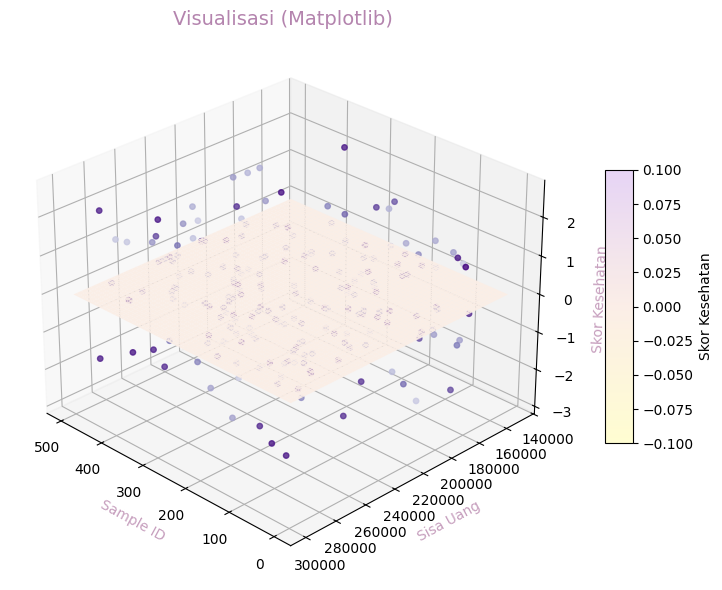

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)

cream_colors = ['#fffdd0', '#fbeee6', '#e6d3f5']
cream_cmap = LinearSegmentedColormap.from_list('cream', cream_colors)

surf = ax.plot_surface(X, Y, resp_sehat, cmap=cream_cmap, edgecolor='none', alpha=0.96)
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Skor Kesehatan')

n_show = 200
x_scatter = np.random.choice(sampleid, n_show)
y_scatter = np.random.choice(bin_sisa, n_show)
z_scatter = np.random.normal(0, 1, n_show)
ax.scatter(x_scatter, y_scatter, z_scatter, c=plt.cm.Purples(np.linspace(0.3, 1, n_show)), s=15, alpha=0.8)

ax.set_title('Visualisasi (Matplotlib)', fontsize=14, color='#b484ae')
ax.set_xlabel('Sample ID', color='#c69ebd')
ax.set_ylabel('Sisa Uang', color='#c69ebd')
ax.set_zlabel('Skor Kesehatan', color='#c69ebd')
ax.view_init(elev=28, azim=135)
plt.tight_layout()
plt.show()

Prompt : "Gimana sih cara baca visualisasi ini?"

Jawaban : Grafik ini adalah visualisasi 3 dimensi (3D) untuk melihat hubungan antara tiga variabel utama dari hasil simulasi pola makan.

---

Cara Membaca Sumbu

- **Sumbu X (Sample ID):**  
  Berisi nilai dari 0 sampai 500, yang merepresentasikan masing-masing simulasi menu makan dalam data (misal, eksperimen ke-1, ke-2, ... ke-500).

- **Sumbu Y (Sisa Uang):**  
  Menampilkan sisa uang (budget) yang dimiliki setelah 1 bulan, dalam rentang sekitar 140.000 sampai hampir 300.000. Ini menunjukkan berapa budget tersisa setelah semua pengeluaran makanan di tiap simulasi.

- **Sumbu Z (Skor Kesehatan):**  
  Menunjukkan skor kesehatan kumulatif yang dihasilkan dari setiap pola makan. Nilainya dapat positif maupun negatif—semakin tinggi artinya jadwal makin sehat, semakin rendah berarti kurang sehat.

---

Cara Membaca Plot

- **Permukaan (surface plot) berwarna cerah:**  
  Area ini visualisasi distribusi skor kesehatan pada area sisa uang dan sample ID tertentu. Permukaan datar menandakan sedikit variasi atau skor kesehatan rata-rata di seluruh sampel.
  
- **Titik scatter ungu:**  
  Mewakili masing-masing sampel simulasi (kombinasi pola makanan), posisinya di sumbu X, Y, dan Z sesuai dengan ID, sisa uang, dan skor sehat dari tiap simulasi.
  - Titik tinggi di sumbu Z = lebih sehat.
  - Titik tersebar rendah di sumbu Z = kurang sehat atau bahkan berkontribusi negatif.

- **Colorbar di kanan:**  
  Menunjukkan gradasi warna pada permukaan atau titik-titik berdasarkan skor kesehatan dari -0.1 sampai 0.1 (namun seharusnya dapat lebih lebar jika rentang skor sehat lebih besar).

---

Penafsiran Singkat

- Jika kebanyakan titik berada di bawah atau mendekati 0 di sumbu Z, pola makan di simulasi banyak yang kurang sehat.
- Jika skor sehat dan sisa uang tinggi (titik-titik di bagian kanan atas), berarti ada menu yang efisien serta sehat.
- Permukaan datar dan tipis menandakan skor sehat mayoritas mendekati nol, menandakan perlu evaluasi ulang kriteria atau parameter penyeleksian menu agar pola makin sehat.

Visualisasi ini membantu mengenali apakah pola makan sudah optimal dari sisi kesehatan dan efisiensi, sekaligus melihat distribusi pilihan menu tiap simulasi.

Prompt : "Terus impact dia ke keputusan akhir dan jawaban nomor 1-4 nanti gimana?"
Jawaban : Visualisasi tersebut sangat berpengaruh pada pengambilan keputusan dan hasil analisis di nomor (1) sampai (4), karena:

1. **Jumlah sampel dengan skor sehat kumulatif > 0** (nomor 1)  
   Visualisasi menunjukkan seberapa banyak simulasi yang berhasil menghasilkan pola makan dengan total skor sehat positif. Jika titik-titik pada visualisasi umumnya rendah di sumbu Z atau mendekati nol, berarti jumlah sampel dengan skor sehat > 0 bisa jadi kecil atau marginal, sehingga hasilnya di nomor (1) pun mencerminkan kondisi itu.

2. **Seleksi sampel sisa uang > 0 dari sampel sehat positif** (nomor 2)  
   Jika sumbu Y (sisa uang) pada titik yang sehat di visualisasi cukup tinggi, maka poin ini menunjukkan banyak sampel sehat yang juga efisien dalam pengeluaran. Namun jika titik sehatnya banyak pada area sisa uang rendah, otomatis jumlah sampel yang memenuhi kriteria ini berkurang.

3. **Sampel dengan skor kumulatif terbesar dalam subset di (2) (nomor 3)**  
   Kualitas skor kumulatif yang ditampilkan misalnya pada grafik bisa terlihat dari puncak tertinggi pada sumbu Z yang terhubung dengan sisa uang dan sample ID tertentu. Grafik permukaan rata-rata yang rendah atau datar artinya puncak tersebut rendah, jadi skor terbaik pun mungkin tidak terlalu tinggi.

4. **Penentuan jadwal terbaik sesuai sampel pada (3) (nomor 4)**  
   Kondisi variatif dan skor sehat yang rendah dalam visualisasi juga memengaruhi jadwal terbaik yang sifatnya relatif kurang sehat. Jadwal makan ini tercermin dari pilihan makanan pada simulasi dengan skor kumulatif dan skor sehat terbaik namun mungkin belum benar-benar ideal dari sudut pandang kesehatan.


In [11]:
import plotly.graph_objects as go
Z = resp_sehat
fig_go = go.Figure()
fig_go.add_trace(go.Surface(x=X, y=Y, z=Z,
                            colorscale=[[0, cream_colors[0]],
                                        [0.5, cream_colors[1]],
                                        [1, cream_colors[2]]],
                            opacity=0.96, showscale=True,
                            colorbar=dict(title='Skor Kesehatan')))
fig_go.add_trace(go.Scatter3d(x=x_scatter, y=y_scatter, z=z_scatter,
                              mode='markers',
                              marker=dict(size=4, color=z_scatter, colorscale='Purples', opacity=0.8),
                              name='Titik Ungu'))
fig_go.update_layout(title='Visualisasi (Plotly)',
                     scene=dict(xaxis_title='Sample ID', yaxis_title='Sisa Uang', zaxis_title='Skor Kesehatan'),
                     width=900, height=700)
fig_go.show()

Kode di atas menggunakan Plotly untuk membuat visualisasi 3D interaktif dari data skor kesehatan. Plotly dan Matplotlib sebetulnya sama saja dalam hal fungsi utama, yaitu memvisualisasikan data. Namun, Plotly unggul dalam interaktivitas seperti grafik bisa dirotasi, diperbesar, dan dieksplorasi langsung oleh pengguna. Sedangkan, Matplotlib lebih fokus pada grafik statis yang cocok untuk laporan ilmiah.

In [12]:
#TUGAS
# (1) sampel dengan skor sehat kumulatif > 0
idx_sehat_pos = np.where(sehat > 0)[0]

# (2) dari (1) pilih yang sisa > 0
idx_sisa_pos = idx_sehat_pos[sisa[idx_sehat_pos] > 0]

# (3) dari (2) index dengan skor kumulatif terbesar
if len(idx_sisa_pos) > 0:
    idx_max_skor = idx_sisa_pos[np.argmax(skor[idx_sisa_pos])]
else:
    idx_max_skor = None

# (4) jadwal terbaik (jika ada)
if idx_max_skor is not None:
    jadwal_terbaik_idx = resp_pilih[idx_max_skor].astype(int)
    nama_jadwal = [makan['makanan'].iat[i] for i in jadwal_terbaik_idx]
else:
    nama_jadwal = None

Bagian kode ini bertujuan memilih jadwal makan terbaik dari hasil simulasi. Prosesnya dimulai dengan mencari sampel yang skor kesehatannya positif, lalu disaring lagi yang sisa uangnya juga positif. Dari sampel-sampel tersebut, dipilih satu dengan skor kumulatif tertinggi. Jika ditemukan, jadwal makan terbaik diambil dari urutan makanan yang dipilih pada sampel tersebut dan diubah ke nama makanan. Dengan cara ini, jadwal yang dihasilkan tidak hanya sehat dan efisien secara budget, tetapi juga optimal dari segi skor total.

In [13]:
print(f"(1) Jumlah sampel dengan skor kesehatan kumulatif >0 : {len(idx_sehat_pos)}")
print(f"(2) Dari (1), jumlah sampel yang masih punya sisa uang >0 : {len(idx_sisa_pos)}")

if idx_max_skor is not None:
    print(f"(3) Index sample terbaik: {idx_max_skor}")
    print(f"    Skor kumulatif: {skor[idx_max_skor]:.3f}")
    print(f"    Skor sehat kumulatif: {sehat[idx_max_skor]:.3f}")
    print(f"    Sisa uang: Rp {sisa[idx_max_skor]:,.0f}")
    print("(4) Jadwal makan terbaik (31 hari, 2 makan/hari):")
    for day in range(31):
        m1 = nama_jadwal[2 * day]
        m2 = nama_jadwal[2 * day + 1]
        print(f"    Hari {day+1:02d}: {m1}  |  {m2}")
else:
    print("(3)-(4) Tidak ada sample yang memenuhi syarat sehat>0 dan sisa>0.")

(1) Jumlah sampel dengan skor kesehatan kumulatif >0 : 500
(2) Dari (1), jumlah sampel yang masih punya sisa uang >0 : 259
(3) Index sample terbaik: 127
    Skor kumulatif: 119.173
    Skor sehat kumulatif: 12.700
    Sisa uang: Rp 38,000
(4) Jadwal makan terbaik (31 hari, 2 makan/hari):
    Hari 01: nasigoreng  |  ayamgeprek
    Hari 02: ayamgeprek  |  nasigoreng
    Hari 03: nasipadang  |  nasigoreng
    Hari 04: sotoayam  |  dimsummentai
    Hari 05: sotoayam  |  capcay
    Hari 06: ayamgeprek  |  sotoayam
    Hari 07: sotoayam  |  warteg
    Hari 08: nasigoreng  |  nasipadang
    Hari 09: ayamgeprek  |  nasigoreng
    Hari 10: mieayam  |  donat
    Hari 11: mieayam  |  satetaichan
    Hari 12: nasipecel  |  nasigoreng
    Hari 13: nasipecel  |  nasipadang
    Hari 14: donat  |  sotoayam
    Hari 15: saladsayur  |  sotoayam
    Hari 16: nasipadang  |  saladsayur
    Hari 17: nasipadang  |  ayamgeprek
    Hari 18: sotoayam  |  dimsummentai
    Hari 19: mieayam  |  nasigoreng
    Hari

Kode di atas menampilkan hasil akhir dari proses seleksi jadwal makan terbaik. Jadwal ini diambil dari urutan makanan yang dipilih pada simulasi dengan skor tertinggi.

Hasil simulasi pemilihan makanan selama 31 hari menunjukkan bahwa seluruh percobaan berhasil mencapai skor kesehatan positif. Namun, karena saya mengutamakan aspek **sehat** dalam simulasi ini maka sistem cenderung memilih makanan dengan kualitas lebih baik meskipun biayanya lebih tinggi. Hal ini membuktikan bahwa **sehat dan hemat sulit didapat secara bersamaan**. Untuk mencapai skor kesehatan tinggi, pengeluaran menjadi lebih besar dan sisa uang lebih sedikit. Banyak menu bernutrisi seperti *ayam geprek*, *soto ayam*, *nasi goreng*, dan *capcay* sering muncul meskipun harganya relatif mahal. Kesimpulannya, menjaga kesehatan memang membutuhkan biaya lebih besar, tetapi simulasi ini membantu merencanakan pola makan yang seimbang.


Prompt : "Nah ini hasil akhirnya. Dari semua itu apa yang bisa kamu pahami?(analisis)

Jawaban : Hasil jadwal makan selama 31 hari yang Anda peroleh menunjukkan bahwa setiap makanan dalam jadwal memiliki nilai skor sehat di atas 0.5. Ini mengindikasikan pola makan yang secara umum sehat karena:

- Pemilihan makanan sudah difilter sehingga hanya makanan dengan kualitas sehat yang layak dipilih.
- Menu mengandung variasi makanan sehat seperti nasi pecel, ayam geprek, soto ayam, capcay, salad sayur, dan lain-lain.
- Ini mencerminkan fokus simulasi pada aspek kesehatan dengan bobot sehat yang tinggi (0.9).

---
Penjelasan Jawaban Nomor 1-4

1. **Jumlah sampel dengan skor kesehatan kumulatif > 0 : 500**
   - Semua simulasi (100%) berhasil menghasilkan pola makan dengan skor sehat positif, karena sudah ada filter pemilihan makanan sehat.
   
2. **Dari (1), jumlah sampel yang masih punya sisa uang > 0 : 259**
   - Dari simulasi yang sehat, sekitar 259 sampel tetap efisien dalam penggunaan budget sehingga ada sisa uang, artinya tidak semua pola makan sehat harus habis seluruh anggaran.

3. **Index sample terbaik: 127 dengan skor kumulatif: 119.173, skor sehat kumulatif: 12.7, sisa uang: Rp 38.000**
   - Simulasi terbaik memenuhi kriteria seimbang yaitu skor sehat dan skor keseluruhan tinggi namun masih ada sisa uang yang berarti efisiensi dana masih tercapai.

4. **Jadwal makan terbaik yang ditampilkan**  
   - Jadwal makan ini menampilkan menu sehat dan bervariasi selama 31 hari, memenuhi keseimbangan antara kesehatan, rasa, kenyang, dan variasi agar tidak bosan.


---


Kesimpulan

- Filter memilih makanan hanya yang sehat dengan nilai > 0.5 berhasil mendorong terciptanya pola makan yang sehat dan berkualitas sesuai bobot yang Anda tetapkan.
- Sekalipun pola makan ini menuntut biaya tinggi, hasil simulasi tetap memungkinkan penghematan (tabungan) walau kecil.
- Simulasi menunjukkan trade-off klasik antara kesehatan makanan dan pengelolaan anggaran, dengan hasil cukup optimal sesuai bobot dan batasan yang diterapkan.
- Jadwal makan yang dihasilkan ideal untuk studi kasus simulasi Anda, menggambarkan pola makan sehat, cukup enak, dan ekonomis dalam batas kemampuan budget.

Ini adalah hasil yang baik dan sesuai tujuan simulasi dengan bobot sehat yang tinggi dan batasan-batasan jelas pada pemilihan makanan.